# Using xrt to calculate multilayer reflectivity
awojdyla@lbl.gov, January 2022

In this notebook, we use xrt to compute the efficiency of a multilayer in the hard x-ray regime.
This script was written to help a colleague from Paul Scherrer Institute. There is a newer version of this script with many moire features, but I cannot find ...

There is companion file to compute efficiency with Matlab (`multilayer_WSi.m`) using RETICOLO. _initial filename _ml_xrt.ipynb_

In [ ]:
import numpy as np
import xrt.backends.raycing.materials as mat
# https://xrt.readthedocs.io/raycing.html#xrt.backends.raycing.materials.Multilayer

In [2]:
# useful to get the material densities, requires pip install peridictable

#import periodictable as pt
#rho_si = pt.Si.density
#rho_mo = pt.Mo.density

In [3]:
# Setting up the multilayer

# top layer material
tLayer=mat.Material('Si',table='Henke', rho=2.33)
# top layer thickness
tThickness_m=69e-10*0.6

# bottom layer material
bLayer=mat.Material('Mo',table='Henke', rho=10.22)
# bottom layer thickness
bThickness_m=69e-10*0.4

# number of layers
nPairs=40

# substrate (mostly unuseful)
substrate = mat.Material('Si',table='Henke')
ml = mat.Multilayer(tLayer=tLayer, tThickness=tThickness_m*1e10, bLayer=bLayer, bThickness=bThickness_m*1e10, nPairs=nPairs, substrate=substrate, tThicknessLow=0.0, bThicknessLow=0.0, idThickness=0.0, power=2.0)

In [4]:
#calculating multilayer reflectivity

#E photon energuenergy
E_eV = 1239e-9/13.5e-9
E=E_eV

# cosine of incidence angle (cos(theta_inc))
beamInDotNormal = 1 # normal incidence
# beamInDotNormal is cosine of the angle between the incoming beam and the normal


# reflectivity (complex, polarization dependent)
(r_s,r_p) = ml.get_amplitude(E=E_eV, beamInDotNormal=beamInDotNormal)#, beamOutDotNormal=None, beamInDotHNormal=None, xd=None, yd=None)
R = abs(r_s)**2

### Testing a well known case (EUV multilayers)
Si/Mo multilayer, 6.9nm periode with (0.6/0.4 thicknesss).

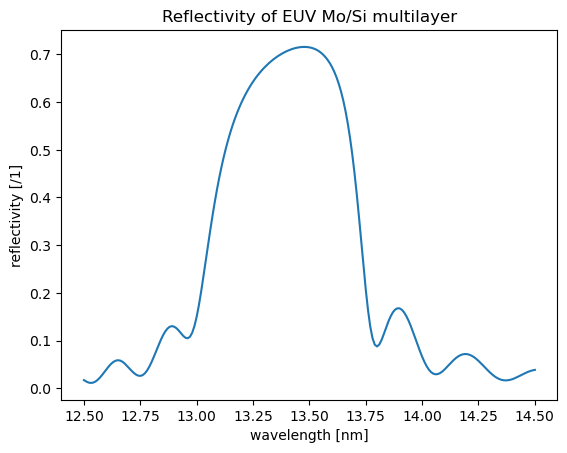

In [5]:
# number of points fro scanning wavelength
N_w = 201

wavelengths_m = np.zeros(N_w)
RR = np.zeros(N_w)
# looping through wavelength
for i_w in np.arange(N_w):
    wavelengths_m[i_w] = 12.5e-9+i_w*0.01*1e-9
    E_eV = 1239e-9/wavelengths_m[i_w]
    (r_s,r_p) = ml.get_amplitude(E=E_eV, beamInDotNormal=beamInDotNormal)#, beamOutDotNormal=None, beamInDotHNormal=None, xd=None, yd=None)
    # reflectivity assuming s-polarization
    RR[i_w] = abs(r_s)**2

import matplotlib.pyplot as plt
plt.plot(wavelengths_m*1e9, RR)
plt.title('Reflectivity of EUV Mo/Si multilayer')
plt.xlabel('wavelength [nm]')
plt.ylabel('reflectivity [/1]')
plt.show()

### Varying silicon layer thickness

In [6]:
N_w = 101
N_si = 21

wavelengths_m = np.zeros(N_w)
si_thick_m = np.zeros(N_si)
RRSi = np.zeros((N_w,N_si))

for i_w in np.arange(N_w):
    wavelengths_m[i_w] = 12.5e-9+i_w*0.02*1e-9
    E_eV = 1239e-9/wavelengths_m[i_w]
    for i_si in np.arange(N_si):
        si_thick_m[i_si] = 6.9e-9*0.6*(0.9+0.2*(i_si/(N_si-1)))
        ml_var = mat.Multilayer(tLayer=tLayer, tThickness=si_thick_m[i_si]*1e10, bLayer=bLayer, bThickness=bThickness_m*1e10, nPairs=nPairs, substrate=substrate, tThicknessLow=0.0, bThicknessLow=0.0, idThickness=0.0, power=2.0)
        (r_s,r_p) = ml_var.get_amplitude(E=E_eV, beamInDotNormal=beamInDotNormal)#, beamOutDotNormal=None, beamInDotHNormal=None, xd=None, yd=None)
        # reflectivity assuming s-polarization
        RRSi[i_w,i_si] = abs(r_s)**2

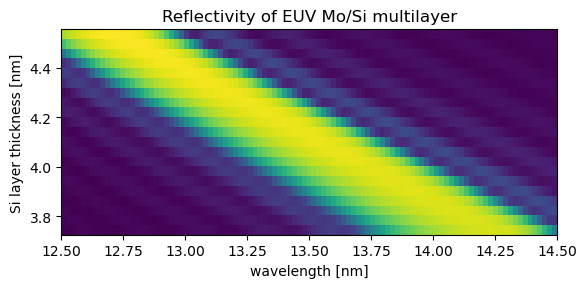

In [7]:
import matplotlib.pyplot as plt

extent = (wavelengths_m[0]*1e9,wavelengths_m[-1]*1e9, si_thick_m[0]*1e9,si_thick_m[-1]*1e9)
aspect = 1

plt.imshow(np.transpose(RRSi),extent = extent, aspect = aspect)
plt.title('Reflectivity of EUV Mo/Si multilayer')
plt.xlabel('wavelength [nm]')
plt.ylabel('Si layer thickness [nm]')
plt.show()